Import des librairies

In [88]:
import pandas as pd
import requests
import shap
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Importation des données

In [89]:
df = pd.read_csv('C:/Users/smart asus/P7_données/code_vs_code/analyse_nettoyage_experiences/Data_for_test/test_data.csv')
df.head()

,Unnamed: 0,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,CC_AMT_PAYMENT_TOTAL_CURRENT_MEAN,CC_AMT_PAYMENT_TOTAL_CURRENT_VAR,CC_CNT_DRAWINGS_ATM_CURRENT_SUM,CC_CNT_DRAWINGS_CURRENT_MAX,CC_CNT_DRAWINGS_CURRENT_MEAN,CC_CNT_DRAWINGS_CURRENT_SUM,CC_CNT_DRAWINGS_CURRENT_VAR,CC_CNT_INSTALMENT_MATURE_CUM_MAX,CC_NAME_CONTRACT_STATUS_Active_MEAN,CC_NAME_CONTRACT_STATUS_Active_VAR
0,1000,0,1,0,450000.0,364896.0,26550.0,0.019689,-9828,-1355.0,...,3986.601378,3.508893e+07,3.0,3.0,0.205128,8.0,0.467400,7.0,1.00,0.000000
1,1001,1,1,0,135000.0,182448.0,14755.5,0.020246,-11906,-666.0,...,3986.601378,3.508893e+07,3.0,3.0,0.205128,8.0,0.467400,7.0,1.00,0.000000
2,1002,1,0,0,135000.0,1094688.0,39451.5,0.015221,-18874,-5739.0,...,21168.822375,4.705063e+09,22.0,8.0,0.550000,22.0,2.458974,19.0,0.75,0.192308
3,1003,1,0,0,90000.0,104256.0,11074.5,0.030755,-22125,-1663.0,...,0.000000,0.000000e+00,0.0,0.0,0.000000,0.0,0.000000,0.0,1.00,0.000000
4,1004,0,0,1,112500.0,450000.0,35685.0,0.026392,-14129,-716.0,...,3986.601378,3.508893e+07,3.0,3.0,0.205128,8.0,0.467400,7.0,1.00,0.000000


Rentrez le nuéméo du client

In [72]:
id = 199

In [73]:
data_prediction =df.iloc[[id]]

Transformation de notre donnée en format json

In [74]:
data_pred_json = data_prediction.to_dict(orient='records')

Réponse de la requête issu de notre api

In [75]:
result=requests.post(url="https://api-f0va.onrender.com/predict",json=data_pred_json).json()

Extraction de nos résultats

In [76]:
prediction = result["prediction"]
probability = result["probability"]
shap_values_data = result["shap_values"]
feature_globale = result["feature_global"]

Prédiction du modèle pour ce client

In [86]:
print("La prédiction pour le client numéro" ,id," est de", prediction)

La prédiction pour le client numéro 199  est de 0.0


Tableau des probabilités d'accord et de refus

In [90]:
# Créer un DataFrame avec deux colonnes
if prediction ==0:
    prediction_probability = pd.DataFrame({"numéro_client":[id],"prediction": [prediction], "probability of approval": [probability*100], "probability of rejection":[(1-probability)*100]})
else:
    prediction_probability = pd.DataFrame({"numéro_client":[id],"prediction": [prediction], "probability of approval": [(1-probability)*100], "probability of rejection":[probability*100]})
prediction_probability

,numéro_client,prediction,probability of approval,probability of rejection
0,199,0.0,87.0,13.0


In [93]:
if prediction == 0:
    print("La probabilité d'attribution du crédit au client numéro", id,"est de", probability*100, "%")
    print("La probabilité de non attribution du crédit au client numéro", id,"est de", ((1-probability)*100), "%")
else:
    print("La probabilité d'attribution du crédit au client numéro", id,"est de", (1-probability)*100, "%")
    print("La probabilité de non attribution du crédit au client numéro", id,"est de", probability*100, "%")

La probabilité d'attribution du crédit au client numéro 199 est de 87.0 %
La probabilité de non attribution du crédit au client numéro 199 est de 13.0 %


Affichage des features locales pour le client en question

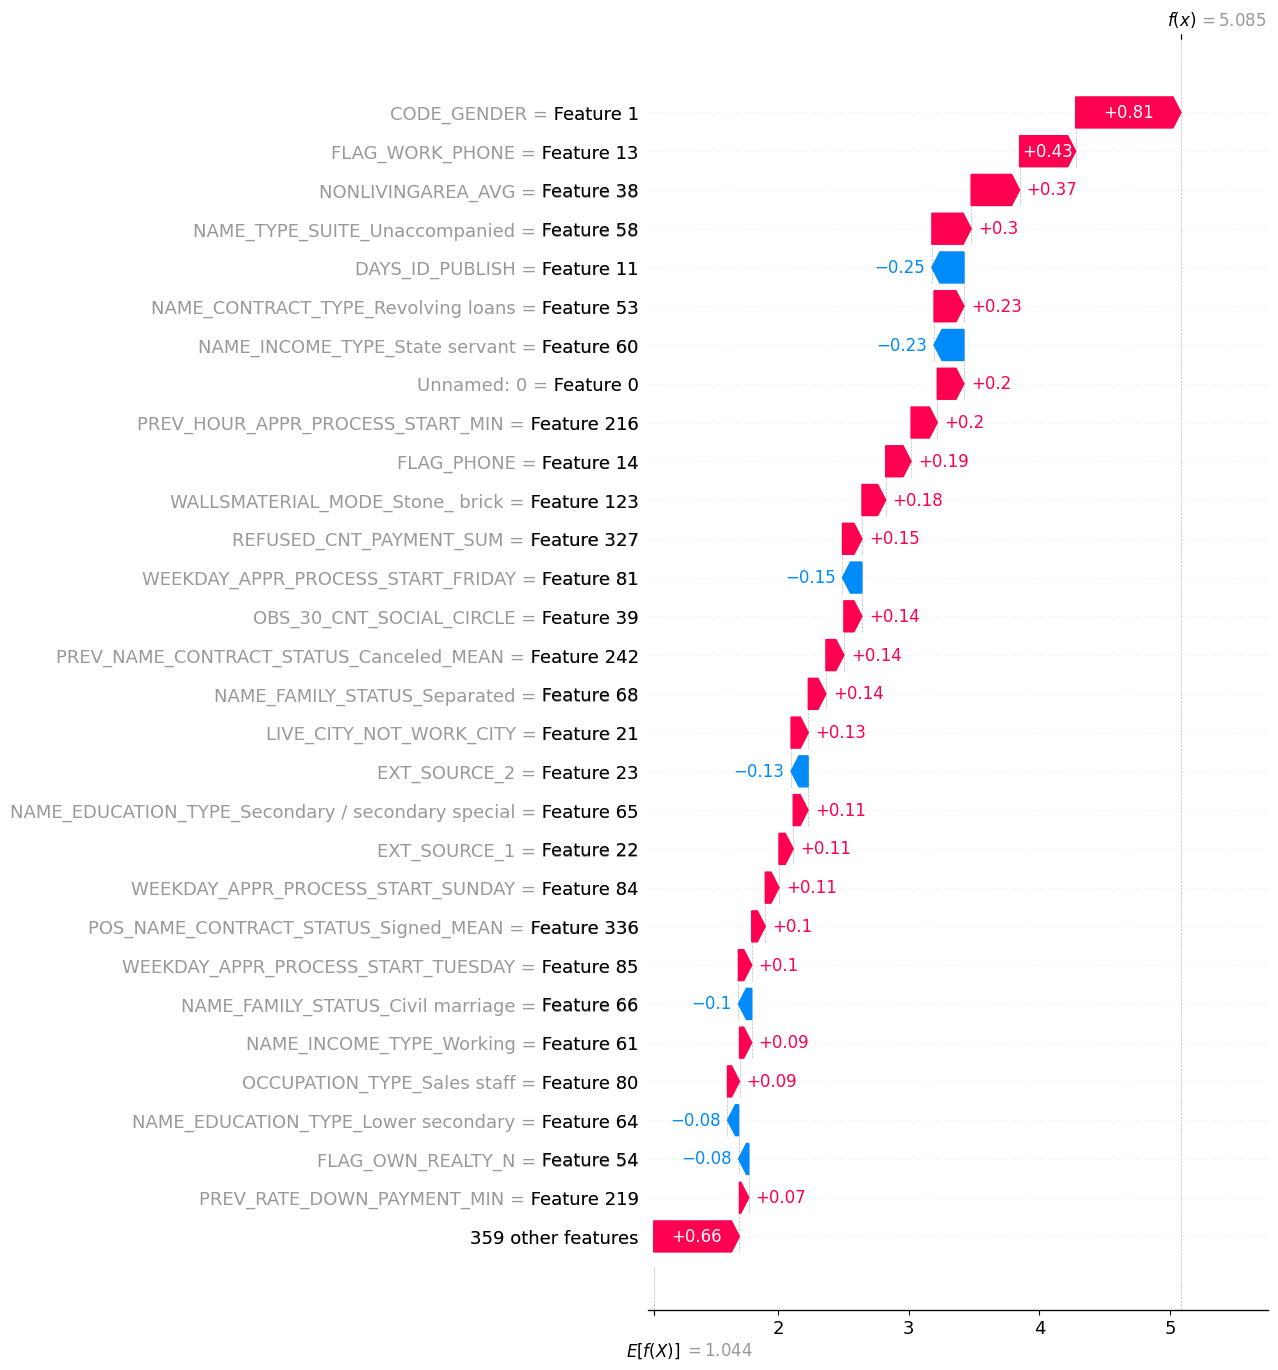

In [49]:
shap_values_data
exp = shap.Explanation(np.array(shap_values_data['values']),np.array(shap_values_data['base_values']), df.columns)
shap.plots.waterfall(exp[0], max_display=30, show=True)

Affichage des features globales

<AxesSubplot: xlabel='importance', ylabel='feature'>

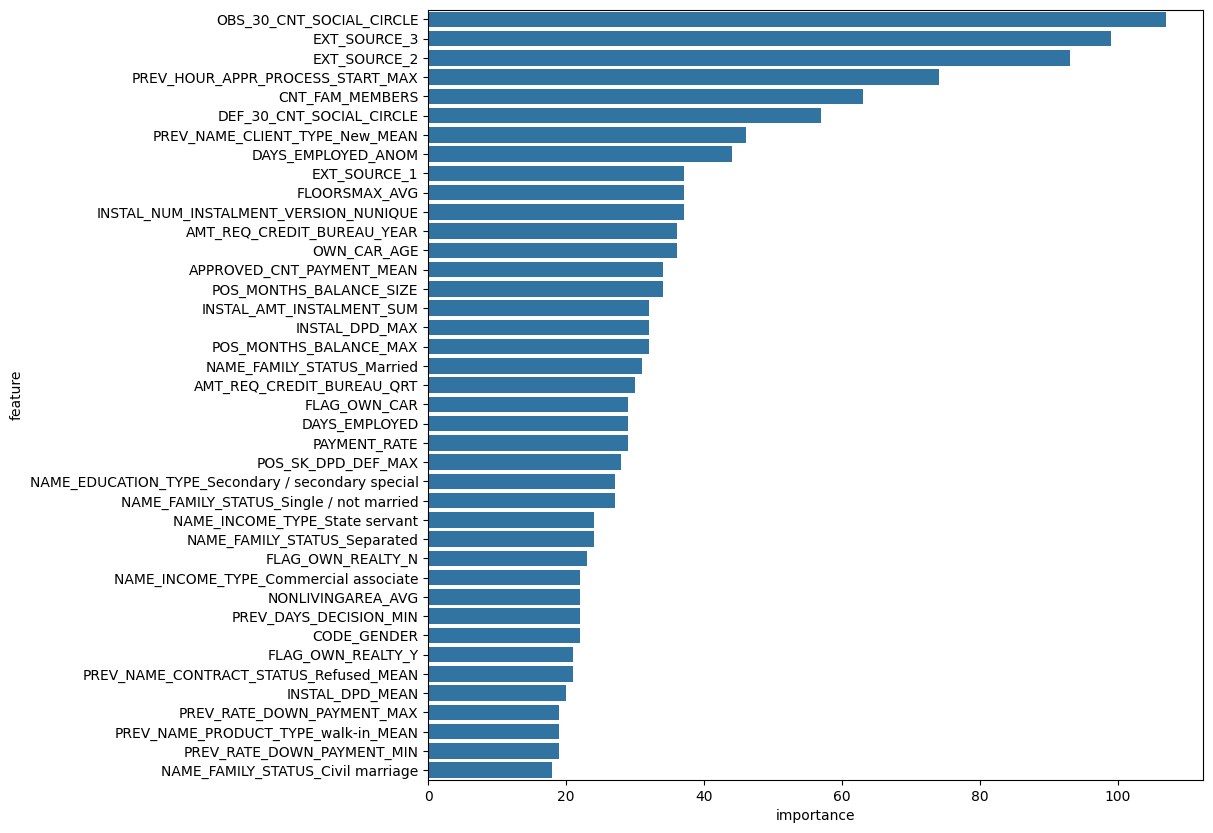

In [50]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x="importance", y="feature", data=pd.DataFrame(feature_globale))